<a href="https://colab.research.google.com/github/victoraccete/SMTT-EDA/blob/main/SMTT_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise exploratória de dados de viagens fornecidos pela SMTT
**Feito por: Victor Accete**

Feito no Colab. 
Diversos gráficos e tabelas para analisar dados de viagens não cumpridas e dados de atrasos. 

Usando plotly numa versão mais atualizada do que a disponibilizada no Colab para ter acesso a recursos mais modernos. 

**Após atualizar, favor reiniciar ambiente de execução.**

In [1]:
!pip install plotly==4.5

     |████████████████████████████████| 7.1MB 3.7MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


Baixando arquivos .py feitos por mim para manter o notebook mais organizado, mais fácil de navegar e mais legível!   
Os arquivos estão disponíveis no painel na esquerda.

In [2]:
!wget https://raw.githubusercontent.com/victoraccete/SMTT-EDA/main/plotting.py
!wget https://raw.githubusercontent.com/victoraccete/SMTT-EDA/main/preprocessing.py

--2021-02-13 02:00:37--  https://raw.githubusercontent.com/victoraccete/SMTT-EDA/main/plotting.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13775 (13K) [text/plain]
Saving to: ‘plotting.py’

plotting.py         100%[===================>]  13.45K  --.-KB/s    in 0s      

2021-02-13 02:00:38 (107 MB/s) - ‘plotting.py’ saved [13775/13775]

--2021-02-13 02:00:38--  https://raw.githubusercontent.com/victoraccete/SMTT-EDA/main/preprocessing.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8609 (8.4K) [text/plain]
Saving to: ‘pr

In [3]:
import plotting as plot
import preprocessing as prep

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
pd.options.mode.chained_assignment = None
sns.set_style('white')

In [5]:
URL = 'https://raw.githubusercontent.com/victoraccete/SMTT-EDA/main/viagens.csv'

travels = prep.load_data(URL, ['hora_prevista', 'hora_realizada'])
print(travels.shape)
travels.tail()

(21702, 13)


,numero_viagem_da_linha_no_dia,ordem_veiculo_na_linha_no_dia,duracao_total_realizada,nome_linha,atendimento,empresa,numero_ordem_veiculo,numero_linha,hora_prevista,hora_realizada,duracao_prevista,duracao_realizada,sentido_viagem
21697,21886,3,65.0,Cruz das Almas / Trapiche,107-EMBARQUE SOMENTE COM CARTÃO,Auto Viação Veleiro LTDA,3139,107,2020-10-06 21:11:00,2020-10-06 21:04:00,54,28.0,volta
21698,21887,1,36.0,Cruz das Almas / Trapiche,TRAPICHE/CRUZ DAS ALMAS,Auto Viação Veleiro LTDA,3150,107,2020-10-06 21:05:00,2020-10-06 21:03:00,45,36.0,ida
21699,21888,1,36.0,Cruz das Almas / Trapiche,TRAPICHE/CRUZ DAS ALMAS,Auto Viação Veleiro LTDA,3150,107,2020-10-06 21:51:00,2020-10-06 21:42:00,44,NaN,volta
21700,21889,2,NaN,Cruz das Almas / Trapiche,TRAPICHE/CRUZ DAS ALMAS,Auto Viação Veleiro LTDA,3805,107,2020-10-06 21:55:00,NaT,45,NaN,ida
21701,21890,2,NaN,Cruz das Almas / Trapiche,TRAPICHE/CRUZ DAS ALMAS,Auto Viação Veleiro LTDA,3805,107,2020-10-06 22:41:00,NaT,44,NaN,volta


# Análise de viagens não cumpridas

## Definindo "apelidos" para os nomes das empresas
Para diminuir a verbosidade, escrevi um dicionário cujas chaves são os nomes completos das empresas e os valores são os "apelidos", ou seja, os nomes populares. Então, mapeei esses valores para atualizar o conjunto de dados. 

In [6]:
company_map = {
    'Real Transportes Urbanos Ltda.': 'Real Alagoas',
    'Auto Viação Veleiro LTDA': 'Veleiro', 
    'Empresa São Francisco': 'São Francisco', 
    'Viação Cidade de Maceió': 'Cidade de Maceió'
}
travels['apelido_empresa'] = travels["empresa"].replace(company_map)
travels.head(2)

,numero_viagem_da_linha_no_dia,ordem_veiculo_na_linha_no_dia,duracao_total_realizada,nome_linha,atendimento,empresa,numero_ordem_veiculo,numero_linha,hora_prevista,hora_realizada,duracao_prevista,duracao_realizada,sentido_viagem,apelido_empresa
0,1,1,80.0,Village Campestre II X Centro / Farol,Village Campestre II X Centro / Farol,Real Transportes Urbanos Ltda.,4636,46,2020-10-04 05:30:00,2020-10-04 05:26:00,45,40.0,ida,Real Alagoas
1,2,1,80.0,Village Campestre II X Centro / Farol,Village Campestre II X Centro / Farol,Real Transportes Urbanos Ltda.,4636,46,2020-10-04 06:15:00,2020-10-04 06:06:00,45,40.0,volta,Real Alagoas


In [7]:
travels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21702 entries, 0 to 21701
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   numero_viagem_da_linha_no_dia  21702 non-null  int64         
 1   ordem_veiculo_na_linha_no_dia  21702 non-null  int64         
 2   duracao_total_realizada        19072 non-null  float64       
 3   nome_linha                     21702 non-null  object        
 4   atendimento                    21702 non-null  object        
 5   empresa                        21702 non-null  object        
 6   numero_ordem_veiculo           21702 non-null  int64         
 7   numero_linha                   21702 non-null  int64         
 8   hora_prevista                  21702 non-null  datetime64[ns]
 9   hora_realizada                 19528 non-null  datetime64[ns]
 10  duracao_prevista               21702 non-null  int64         
 11  duracao_realiza

## Quantas viagens não foram realizadas?


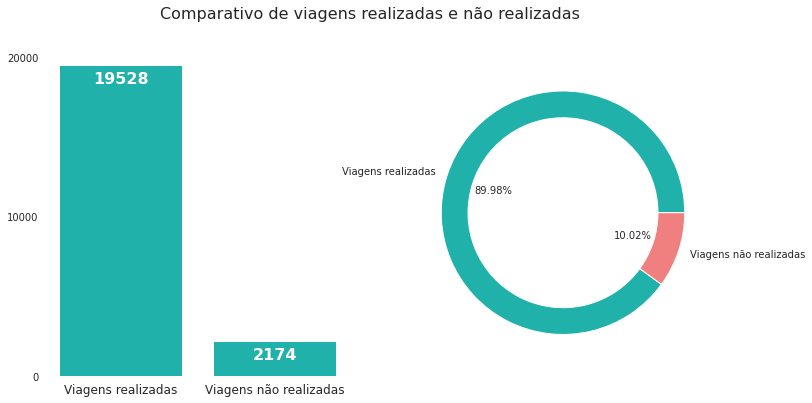

In [8]:
unperformed = travels['hora_realizada'].isna().sum()
performed = (~travels['hora_realizada'].isna()).sum()

plot.plot_performed_vs_unperformed(performed, unperformed)

In [9]:
travels['viagem_realizada'] = ~travels['hora_realizada'].isna()
travels['viagem_realizada'] = travels["viagem_realizada"].replace({True: 'Realizada', False: 'Não realizada'})
travels.head(2)

,numero_viagem_da_linha_no_dia,ordem_veiculo_na_linha_no_dia,duracao_total_realizada,nome_linha,atendimento,empresa,numero_ordem_veiculo,numero_linha,hora_prevista,hora_realizada,duracao_prevista,duracao_realizada,sentido_viagem,apelido_empresa,viagem_realizada
0,1,1,80.0,Village Campestre II X Centro / Farol,Village Campestre II X Centro / Farol,Real Transportes Urbanos Ltda.,4636,46,2020-10-04 05:30:00,2020-10-04 05:26:00,45,40.0,ida,Real Alagoas,Realizada
1,2,1,80.0,Village Campestre II X Centro / Farol,Village Campestre II X Centro / Farol,Real Transportes Urbanos Ltda.,4636,46,2020-10-04 06:15:00,2020-10-04 06:06:00,45,40.0,volta,Real Alagoas,Realizada


In [36]:
#@markdown **Escolha aqui o modo de apresentação do gráfico.**  

#@markdown Após escolher, execute a célula novamente. (clique duas vezes na célula para ver o código)
tipo = 'agrupado' #@param ["agrupado", "empilhado"]
if tipo == 'empilhado':
    plot.plot_performed_vs_unperformed_by_direction(travels, barmode='stack')
else:
    plot.plot_performed_vs_unperformed_by_direction(travels, barmode='group')

## Qual empresa tem mais viagens não realizadas?

In [38]:
#@markdown **Escolha aqui o modo de apresentação do gráfico.**  

#@markdown Após escolher, execute a célula novamente. (Clique duas vezes na célula para ver o código)
tipo = 'agrupado' #@param ["agrupado", "empilhado"]
if tipo == 'empilhado':
    plot.plot_performed_vs_unperformed_by_company(travels, barmode='stack')
else:
    plot.plot_performed_vs_unperformed_by_company(travels, barmode='group')

## Como as viagens não realizadas se distribuem ao longo do dia?

Separando um subconjunto só com viagens não cumpridas:

In [12]:
unperformed_travels = travels[travels['viagem_realizada'] == 'Não realizada']
unperformed_travels.head(2)

,numero_viagem_da_linha_no_dia,ordem_veiculo_na_linha_no_dia,duracao_total_realizada,nome_linha,atendimento,empresa,numero_ordem_veiculo,numero_linha,hora_prevista,hora_realizada,duracao_prevista,duracao_realizada,sentido_viagem,apelido_empresa,viagem_realizada
177,178,1,43.0,Cidade Sorriso I X Terminal Integrado B.Bentes,Cid. Sorriso I X T.I B. Bentes (Somente Cartão),Real Transportes Urbanos Ltda.,4058,804,2020-10-04 11:15:00,NaT,15,NaN,volta,Real Alagoas,Não realizada
179,180,1,36.0,Cidade Sorriso I X Terminal Integrado B.Bentes,Cid. Sorriso I X T.I B. Bentes (Somente Cartão),Real Transportes Urbanos Ltda.,4058,804,2020-10-04 12:45:00,NaT,15,NaN,volta,Real Alagoas,Não realizada


In [13]:
unperformed_frequency_hour = prep.get_unperformed_frequency(unperformed_travels)

In [40]:
#@markdown **Escolha aqui o modo de apresentação do gráfico.**  

#@markdown Após escolher, execute a célula novamente. (Clique duas vezes na célula para ver o código)

tipo = 'linha' #@param ["linha", "barras"]
if tipo == 'linha':
    plot.plot_unperformed_frequency(unperformed_frequency_hour, kind="line")
else:
    plot.plot_unperformed_frequency(unperformed_frequency_hour, kind="bar")

## As 10 linhas com mais viagens não realizadas e suas empresas

In [41]:
top_10_unperformed = prep.get_top_n_unperformed(unperformed_travels, 10)
top_10_unperformed.sort_values(by='viagens não realizadas', ascending=False)

,nome_linha,apelido_empresa,viagens não realizadas
2,Alto de Ipioca,Cidade de Maceió,252
46,Pontal/UFAL,Veleiro,191
44,Ponta Verde / Vergel,Veleiro,173
7,Circular I,Veleiro,109
8,Circular II,Veleiro,106
38,Joaquim Leão/Ponta Verde,Veleiro,103
45,Pontal / Iguatemi,Veleiro,103
18,Cruz das Almas / Trapiche,Veleiro,94
14,Colina / Poço,São Francisco,84
65,Vergel / Ponta Verde,Veleiro,65


In [42]:
plot.plot_top_unperformed(top_10_unperformed)

## Como as viagens não realizadas se distribuem pelos dias da semana?


In [17]:
unperformed_frequency_weekday = prep.get_unperformed_frequency(unperformed_travels, by="weekday")
unperformed_frequency_weekday

,Dia da semana,Viagens não realizadas
0,Segunda-feira,348
1,Terça-feira,311
2,Quarta-feira,272
3,Quinta-feira,324
4,Sexta-feira,322
5,Sábado,334
6,Domingo,263


In [44]:
#@markdown **Escolha aqui o modo de apresentação do gráfico.**  

#@markdown Após escolher, execute a célula novamente. (Clique duas vezes na célula para ver o código)

tipo = 'barras' #@param ["linha", "barras"]
if tipo == 'linha':
    plot.plot_unperformed_frequency(unperformed_frequency_weekday, by="weekday", kind="line")
else:
    plot.plot_unperformed_frequency(unperformed_frequency_weekday, by="weekday", kind="bar")

# Análise de atraso

## Qual o atraso médio total?


Separando apenas as viagens realizadas, uma vez que não é possível realizar uma análise de atraso sobre viagens não realizadas. 

In [19]:
performed_travels = travels[travels['viagem_realizada'] == 'Realizada']

In [20]:
performed_travels = prep.generate_delay_status_column(performed_travels)
performed_travels = prep.calculate_delay(performed_travels)
performed_travels.tail(3)

,numero_viagem_da_linha_no_dia,ordem_veiculo_na_linha_no_dia,duracao_total_realizada,nome_linha,atendimento,empresa,numero_ordem_veiculo,numero_linha,hora_prevista,hora_realizada,duracao_prevista,duracao_realizada,sentido_viagem,apelido_empresa,viagem_realizada,status_de_atraso,tempo_de_atraso
21697,21886,3,65.0,Cruz das Almas / Trapiche,107-EMBARQUE SOMENTE COM CARTÃO,Auto Viação Veleiro LTDA,3139,107,2020-10-06 21:11:00,2020-10-06 21:04:00,54,28.0,volta,Veleiro,Realizada,Adiantado,-7.0
21698,21887,1,36.0,Cruz das Almas / Trapiche,TRAPICHE/CRUZ DAS ALMAS,Auto Viação Veleiro LTDA,3150,107,2020-10-06 21:05:00,2020-10-06 21:03:00,45,36.0,ida,Veleiro,Realizada,Adiantado,-2.0
21699,21888,1,36.0,Cruz das Almas / Trapiche,TRAPICHE/CRUZ DAS ALMAS,Auto Viação Veleiro LTDA,3150,107,2020-10-06 21:51:00,2020-10-06 21:42:00,44,NaN,volta,Veleiro,Realizada,Adiantado,-9.0


### Observação!
Ao plotar um boxplot, percebi que havia alguns valores extremamente altos de atraso ou adiantamento. Observei mais de 23 horas de atraso ou de adiantamento, o que não parece razoável.  
  
Vamos olhar um exemplo de um desses casos:

In [21]:
performed_travels[abs(performed_travels['tempo_de_atraso']) > 1000].iloc[5:6].loc[:, ['hora_prevista', 'hora_realizada', 'status_de_atraso', 'tempo_de_atraso']]

,hora_prevista,hora_realizada,status_de_atraso,tempo_de_atraso
1426,2020-10-07 23:58:00,2020-10-07 00:12:00,Adiantado,-1426.0


Vemos um suposto adiantamento de 1426 segundos, que significa mais de 23h45min de adiantamento. Podemos ver que a hora prevista de saída era bem próxima da meia noite. Demais casos de valores extremamente discrepantes também são parecidos.  

Ou seja, certamente, ao invés de um adiantamento de 1426 minutos, houve um **atraso** de 14 minutos. Isso acontece porque a forma que o conjunto de dados foi criado não considera o dia, apenas a hora. 

Por isso, vamos calcular o atraso e o adiantamento real usando o valor 1400 (ou -1400) como referência (porque 1400 minutos são 24 horas). 

In [22]:
performed_travels = prep.fix_outliers_delays(performed_travels)
assert performed_travels[abs(performed_travels['tempo_de_atraso']) > 1000].shape[0] == 0

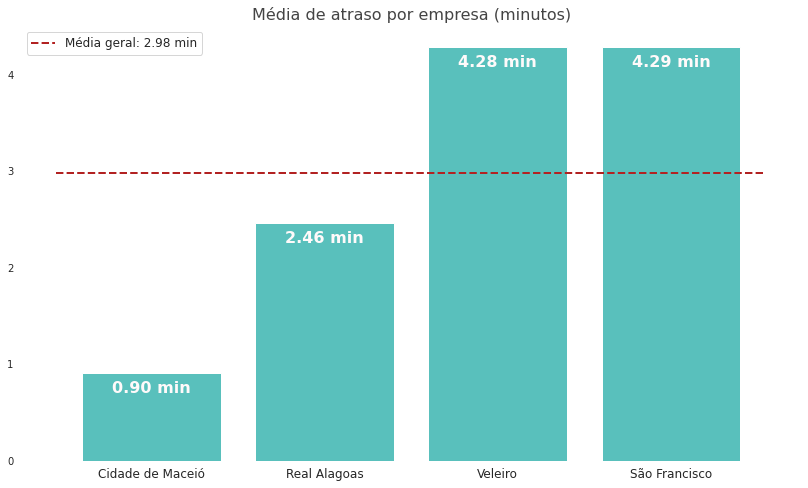

In [23]:
plot.plot_mean_delay(performed_travels)

In [24]:
plot.plot_mean_delay_by_direction(performed_travels)

In [25]:
plot.plot_boxplot_delay(performed_travels)

## Quais empresas tem o maior número de atrasos?

In [26]:
delay_info = prep.get_delay_info(performed_travels)

In [27]:
plot.plot_delay_info(delay_info)

## Como os atrasos se distribuem ao longo do dia?

In [28]:
delay_by_hour = prep.get_delay_avg_info(performed_travels)

In [46]:
#@markdown **Escolha aqui o modo de apresentação do gráfico.**  

#@markdown Após escolher, execute a célula novamente. (Clique duas vezes na célula para ver o código)

tipo = 'linha' #@param ["linha", "barras"]
if tipo == 'linha':
    plot.plot_delay_info_hour(delay_by_hour, kind='line')
else:
    plot.plot_delay_info_hour(delay_by_hour, kind='bar')

## Como os atrasos médios se distribuem pelos dias da semana?

In [30]:
delay_by_day = prep.get_delay_avg_info(performed_travels, by="weekday")

In [47]:
#@markdown **Escolha aqui o modo de apresentação do gráfico.**  

#@markdown Após escolher, execute a célula novamente. (Clique duas vezes na célula para ver o código)

tipo = 'barras' #@param ["linha", "barras"]
if tipo == 'linha':
    plot.plot_delay_info_weekday(delay_by_day, kind='line')
else:
    plot.plot_delay_info_weekday(delay_by_day, kind='bar')

## Quais linhas tem o maior número de atrasos?

In [33]:
top_10_delayed = prep.get_top_n_delayed(performed_travels, 10)
top_10_delayed.sort_values(by="Percentual de viagens com atraso", ascending=False)

,nome_linha,apelido_empresa,Frequência de atrasos,Percentual de viagens com atraso
19,Corujão Benedito Bentes X Ponta Verde / E. Gomes,Real Alagoas,27,96.4
29,Graciliano Ramos X Centro / Farol,Real Alagoas,22,91.7
6,Chã nova / Ponta Verde,São Francisco,115,79.9
55,Rio Novo / Ponta Verde via Bebedoro,São Francisco,170,77.6
57,Rosane Collor / Ponta Verde,São Francisco,182,76.2
44,Joaquim Leão/Ponta Verde,Veleiro,84,74.3
9,Circular II,Veleiro,147,74.2
59,Sanatorio / Ponta Verde,Cidade de Maceió,178,73.3
17,Corujao,São Francisco,24,72.7
58,Saem / Iguatemi,Cidade de Maceió,93,72.1


In [34]:
plot.plot_top_delayed(top_10_delayed)